In [51]:
# pip install jenkspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp38-cp38-macosx_10_9_x86_64.whl size=40979 sha256=5a6ad4cb1fc6470980191da734379e1b4e3886368ffc1a51ad303b156d778568
  Stored in directory: /Users/laurengomezcullen/Library/Caches/pip/wheels/92/c2/4f/4f1d3c2fc01225f2a082ceb80611e2b2fb10cb8fb184d78d91
Successfully built jenkspy
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jenkspy


In [2]:
#organising chagas cases data
chagas_cases = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/chagas_cases/colombia_chagas/colombia_total.csv")
chagas_cases = chagas_cases[['MUN_CODE','MUN','TOTAL']]
chagas_cases = chagas_cases.rename(columns={'TOTAL':'TOTAL_CASES'})

chagas_cases['MUN_CODE'] = chagas_cases['MUN_CODE'].apply(lambda x: "{:.1f}".format(x)) #to remove make it a string while keeping the trailing 0
chagas_cases['MUN_CODE'] = chagas_cases['MUN_CODE'].str.replace(".","") #to ensure that there is no empty space
print(chagas_cases)
chagas_cases['MUN_CODE'] = chagas_cases['MUN_CODE'].str.strip(' ')


    MUN_CODE                MUN  TOTAL_CASES
0     200110          AGUACHICA           27
1     500010      VILLAVICENCIO           35
2     152990            GARAGOA           11
3     540010             CUCUTA           52
4     548740  VILLA DEL ROSARIO           19
..       ...                ...          ...
372     7420              SINCE            2
373     4250            MACANAL            1
374     5700       PUEBLO BELLO            1
375     3440             HACARI            5
376     5690     PUERTO CAICEDO            1

[377 rows x 3 columns]


/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_32639/560623541.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chagas_cases['MUN_CODE'] = chagas_cases['MUN_CODE'].str.replace(".","") #to ensure that there is no empty space


In [3]:
# organising svi data
svi_indices = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/vulnerability_indices/colombian_vulnerability_by_municipality.csv")
svi_indices = svi_indices[['DIVIPOLA', 'MPIO_CNMBR', 'MPIO_NAREA', 'IVT']]
svi_indices = svi_indices.rename(columns={'DIVIPOLA':'MUN_CODE', 'MPIO_CNMBR':'MUN', 'MPIO_NAREA':'MUN_AREA', 'IVT':'SVI'})
svi_indices['MUN_CODE'] = svi_indices['MUN_CODE'].astype(str)
svi_indices['MUN_CODE'] = svi_indices['MUN_CODE'].str.strip(' ')
svi_indices.to_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/vulnerability_indices/colombian_vulnerability_by_municipality_corrected.csv", index = False)
print(svi_indices[svi_indices['MUN']=='AGUA DE DIOS'])


    MUN_CODE           MUN   MUN_AREA       SVI
550    25001  AGUA DE DIOS  86.199399 -0.245899


In [4]:
#organising population data
population = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/population_densities/PERSONAS_DEMOGRAFICO_Cuadros_CNPV_2018.csv", skip_blank_lines=True)
pop = population.fillna(method = 'ffill') #filling in blanks
print(pop)
pop = pop.loc[(pop['Unnamed: 2'] == "Total") & (pop['Unnamed: 1'] == "Total")] # only using totals
pop = pop.iloc[1:] #dropping national total
pop = pop[['Unnamed: 0', 'Total']] #droppiong useless columns
pop = pop.rename(columns = {'Unnamed: 0': 'MUN_CODE', 'Total': 'TOTAL_POP'}) #renaming columns
pop_mun_names = pop['MUN_CODE'].str.replace('\d+', '')#removes all numbers in the list
pop_mun_names = pop_mun_names.str.replace('_', '')#removing _
pop_mun_names = pop_mun_names.str.upper() #capitalising
pop['MUN_CODE'] = pop['MUN_CODE'].str.replace('[A-Za-zñáéíóúüÁÑÉÍÓÚÜ_]', '') #removing names
pop['MUN_CODE']= pop['MUN_CODE'].str.lstrip('0')#removes the leading zeros
pop['MUN_CODE']= pop['MUN_CODE'].str.lstrip(' ')
pop['MUN'] = pop_mun_names #attaching new columns
pop = pop[['MUN_CODE', 'MUN', 'TOTAL_POP']].reset_index(drop = True)
# print(pop)


           Unnamed: 0      Unnamed: 1 Unnamed: 2       Total
0                 NaN             NaN        NaN         NaN
1                 NaN           Total      Total  44,164,417
2                 NaN           Total      0 a 4   3,037,781
3                 NaN           Total      5 a 9   3,335,240
4                 NaN           Total    10 a 14   3,610,584
...               ...             ...        ...         ...
80981  99773_Cumaribo  Rural disperso    65 a 69         440
80982  99773_Cumaribo  Rural disperso    70 a 74         269
80983  99773_Cumaribo  Rural disperso    75 a 79         198
80984  99773_Cumaribo  Rural disperso    80 a 84         129
80985  99773_Cumaribo  Rural disperso   85 y más          77

[80986 rows x 4 columns]


/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_32639/1661749671.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  pop_mun_names = pop['MUN_CODE'].str.replace('\d+', '')#removes all numbers in the list
/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_32639/1661749671.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  pop['MUN_CODE'] = pop['MUN_CODE'].str.replace('[A-Za-zñáéíóúüÁÑÉÍÓÚÜ_]', '') #removing names


In [5]:
# reading population and svi to open refine and sorting it

df_pop_svi = pop.merge(svi_indices, on = 'MUN_CODE', how = 'outer')
print(df_pop_svi)
df_pop_svi.to_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/df_pop_svi_open_refine.csv", index = False)


# pop_places = pop[['MUN_CODE', 'MUN']].sort_values('MUN').reset_index(drop = True)
# svi_places = svi_indices[['MUN_CODE', 'MUN']].sort_values('MUN').reset_index(drop = True)
# print(len(pop_places))
# print(len(svi_places))
# df_diff = pd.concat([pop_places,svi_places]).drop_duplicates(keep=False)
# print(df_diff)
# print(pop_places[pop_places['MUN'] == 'AGUA DE DIOS'])
# print(svi_places[svi_places['MUN'] == 'AGUA DE DIOS'])
# df_pop_svi['TOTAL_CASES'] = df_pop_svi['TOTAL_CASES'].fillna(0)
# df_psc = df_pop_svi.merge(chagas_cases, on = 'MUN_CODE', how = 'outer')
# df_psc.to_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/df_to_open_refine.csv", index = False)
# # df_psc["MUN_CODE_x"] = df_psc["MUN_CODE_x"].fillna(df_psc["MUN_CODE"])
# df_psc["MUN_CODE_x"] = df_psc["MUN_CODE_x"].fillna(df_psc["MUN_CODE_y"]).str.rstrip('.0')

     MUN_CODE       MUN_x  TOTAL_POP           MUN_y      MUN_AREA       SVI
0        5001    MEDELLÍN  2,372,330        MEDELLÍN    372.035012 -1.451652
1        5002   ABEJORRAL     17,599       ABEJORRAL    507.245697 -0.077237
2        5004    ABRIAQUÍ      2,159        ABRIAQUÍ    288.111250  0.360621
3        5021  ALEJANDRÍA      3,839      ALEJANDRÍA    127.109904 -1.138512
4        5030       AMAGÁ     26,821           AMAGÁ     83.147652 -0.317653
...       ...         ...        ...             ...           ...       ...
1430    94885         NaN        NaN    LA GUADALUPE   1213.008318  0.370638
1431    95025         NaN        NaN      EL RETORNO  12362.231849  0.822242
1432    99001         NaN        NaN  PUERTO CARREÑO  12241.153242  0.631532
1433    99524         NaN        NaN    LA PRIMAVERA  20215.738764  0.423750
1434    99624         NaN        NaN   SANTA ROSALÍA   1990.817122  0.066561

[1435 rows x 6 columns]


In [6]:
#opening refine data for population and svi indices
df_pop_svi_or = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/df_pop_svi_or.txt")
df_duplicates = df_pop_svi_or[df_pop_svi_or.duplicated(subset = 'MUN_CODE')]

#removing the duplicates and adjoining them to the correct one
for i in df_duplicates['MUN_CODE']:
    df_copies = df_pop_svi_or[df_pop_svi_or['MUN_CODE']==i]
    first_row_index = df_copies.index[0]
    second_row_index = df_copies.index[1]
    df_pop_svi_or.iloc[first_row_index,3:] = df_pop_svi_or.iloc[second_row_index,3:]


In [7]:
#formatting pop and svi data
df_pop_svi_final = df_pop_svi_or.drop_duplicates(subset = "MUN_CODE")
df_pop_svi_final = df_pop_svi_final.drop(columns = "MUN_y")
df_pop_svi_final = df_pop_svi_final.rename(columns={"MUN_x":"MUN"})
df_pop_svi_final["TOTAL_POP"] = df_pop_svi_final["TOTAL_POP"].str.replace(",","") #need to replace as can't convert to float otherwise
df_pop_svi_final["POP_DENS"] = df_pop_svi_final["TOTAL_POP"].astype(float)/df_pop_svi_final["MUN_AREA"]
df_pop_svi_final_no_totpop = df_pop_svi_final.drop(columns = ["TOTAL_POP", "MUN_AREA"])

In [18]:
#doing same as above but now with chagas cases
df_pop_svi_chagas = df_pop_svi_final.merge(chagas_cases, on = 'MUN_CODE', how = 'outer')
df_pop_svi_chagas.to_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/df_pop_svi_chagas_open_refine.csv", index = False)

#analysis showed an error in some of the department codes, so these were changed manually comparing to https://www.datos.gov.co/Mapas-Nacionales/Departamentos-y-municipios-de-Colombia/xdk5-pm3f/data
df_pop_svi_chagas_or = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/df_pop_svi_chagas_or.txt")

#analysis showed that some cases were ambiguous so dropped them
df_pop_svi_chagas_or = df_pop_svi_chagas_or[~df_pop_svi_chagas_or["MUN_y"].str.contains('DESCONOCIDA|SIN MUNICIPIO|EXTERIOR', na=False)]
df_pop_svi_chagas_or=df_pop_svi_chagas_or.reset_index(drop = True)#needed otherwise the for loop fails
df_duplicates = df_pop_svi_chagas_or[df_pop_svi_chagas_or.duplicated(subset = 'MUN_CODE')]

#removing the duplicates and adjoining them to the correct one
for i in df_duplicates['MUN_CODE']:
    df_copies = df_pop_svi_chagas_or[df_pop_svi_chagas_or['MUN_CODE']==i]
    first_row_index = df_copies.index[0]
    second_row_index = df_copies.index[1]
    df_pop_svi_chagas_or.iloc[first_row_index,4:] = df_pop_svi_chagas_or.iloc[second_row_index,4:]

df_pop_svi_chagas_or = df_pop_svi_chagas_or.drop_duplicates(subset = "MUN_CODE")
df_pop_svi_chagas_or = df_pop_svi_chagas_or.reset_index(drop = True)
#an earlier mistake in processing has causes two mismatches, which are changed below
df_pop_svi_chagas_or.iloc[1123, 0] = "27660"
df_pop_svi_chagas_or.iloc[1124, 0] = "20570"

df_duplicates = df_pop_svi_chagas_or[df_pop_svi_chagas_or.duplicated(subset = 'MUN_CODE')]
df_pop_svi_chagas_or = df_pop_svi_chagas_or.reset_index(drop = True)
# print(df_duplicates)
for i in df_duplicates['MUN_CODE']:
    df_copies = df_pop_svi_chagas_or[df_pop_svi_chagas_or['MUN_CODE']==i]
    # print(df_copies)
    first_row_index = df_copies.index[0]
    second_row_index = df_copies.index[1]
    df_pop_svi_chagas_or.iloc[first_row_index,4:] = df_pop_svi_chagas_or.iloc[second_row_index,4:]

df_pop_svi_chagas_2 = df_pop_svi_chagas_or.drop_duplicates(subset = "MUN_CODE")
df_pop_svi_chagas_2.drop(df_pop_svi_chagas_2.tail(1).index,inplace = True)
df_pop_svi_chagas_2["TOTAL_CASES"] = df_pop_svi_chagas_2["TOTAL_CASES"].fillna(0)
df_pop_svi_chagas_2["TOTAL_CASES"] = df_pop_svi_chagas_2["TOTAL_CASES"].astype(int)
df_pop_svi_chagas_2 = df_pop_svi_chagas_2.drop(columns= "MUN_y")
df_pop_svi_chagas_2 = df_pop_svi_chagas_2.rename(columns = {"MUN_x":"MUN"})
df_pop_svi_chagas_2["MUN_CODE"] = df_pop_svi_chagas_2["MUN_CODE"].str.strip()
print(df_pop_svi_chagas_2)

df_pop_svi_chagas_2.to_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/df_pop_svi_chagas_final.csv", index = False)

/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_32639/3953043423.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_svi_chagas_2.drop(df_pop_svi_chagas_2.tail(1).index,inplace = True)
/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_32639/3953043423.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_svi_chagas_2["TOTAL_CASES"] = df_pop_svi_chagas_2["TOTAL_CASES"].fillna(0)
/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_32639/3953043423.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
# comment

# #reading in data from the governmental website to see where the discrepancy is
# df = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/Departamentos_y_municipios_de_Colombia.csv")
# # print(df["CÓDIGO DANE DEL MUNICIPIO"])
# df["CÓDIGO DANE DEL MUNICIPIO"] = df["CÓDIGO DANE DEL MUNICIPIO"].apply(lambda x: "{:.3f}".format(x)) #kept trailing zeroes when converted to string so that it was in same format as other tables
# # print(df["CÓDIGO DANE DEL MUNICIPIO"])
# df["CÓDIGO DANE DEL MUNICIPIO"] = df["CÓDIGO DANE DEL MUNICIPIO"].str.replace('.', '')
# df["CÓDIGO DANE DEL MUNICIPIO"] = df["CÓDIGO DANE DEL MUNICIPIO"].str.lstrip(" ")
# # print(df["CÓDIGO DANE DEL MUNICIPIO"])
# df_diff = pd.concat([df_pop_svi_final['MUN_CODE'],df_pop_svi_chagas_2['MUN_CODE']]).drop_duplicates(keep=False)
# # print(df_diff)
# print('which has 2766')
# print(chagas_cases[chagas_cases['MUN_CODE']== '2057'])
# print('done')
# df_diff_1 = pd.concat([df_pop_svi_final['MUN_CODE'],df["CÓDIGO DANE DEL MUNICIPIO"]]).drop_duplicates(keep=False)
# df_diff_2 = pd.concat([df["CÓDIGO DANE DEL MUNICIPIO"],df_pop_svi_chagas_2['MUN_CODE']]).drop_duplicates(keep=False)
# df_differences = pd.concat([df_diff_1,df_diff_2]).drop_duplicates(keep=False)
# print(df_differences)
# print(df_diff_1)
# print(df_diff_2)
# print(len(df))
# print(len(df_pop_svi_final))
# print(len(df_pop_svi_chagas_2))
# #print(df_diff_1[df_diff_1 == "2057"])
# # df_diff_1.to_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/differences.csv")
# # #so can see that the two dataframes, df_pop_svi_final and df_pop_svi_chagas_2, differ from the colombian government one in the same way, 
# # #except for the 2057, 2766, 27086 municipalities., which df_pop_svi_final does not contain. 

In [107]:
#reading in suitability mean data
suitability_mean_median = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/suitability_mean_median.csv").iloc[:,1:]
df_cases_svi_density = pd.read_csv("/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/df_pop_svi_chagas_final.csv")

# need to convert to string to merge
suitability_mean_median['MUN_CODE'] = suitability_mean_median['MUN_CODE'].astype(str)
df_cases_svi_density['MUN_CODE'] = df_cases_svi_density['MUN_CODE'].astype(str)

df_total = df_cases_svi_density.merge(suitability_mean_median, how = 'outer', on = 'MUN_CODE')

#checking for errors
null = df_total.isnull().any(1)
print(df_total[null])

#adding cases density column
df_total["CASES_DENSITY"] = df_total['TOTAL_CASES']/df_pop_svi_final["TOTAL_POP"].astype(float)


Empty DataFrame
Columns: [MUN_CODE, MUN, SVI, POP_DENS, TOTAL_CASES, SUITABILITY_MEAN, SUITABILITY_MEDIAN]
Index: []


0.0002901915264074289
0.014163175743068024


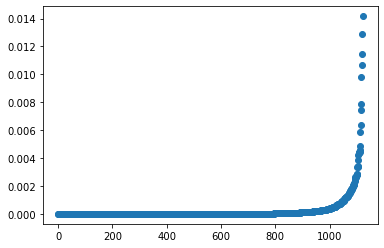

In [108]:
#seeing distribution of data
data = df_total["CASES_DENSITY"]
plt.figure()
plt.scatter(np.arange(len(data)), np.sort(data))
print(data[1000])
print(max(data))

In [98]:
#adding categorical column

#if i want to set my own boundaries
# low = df_total[df_total["CASES_DENSITY"]==0]
# low['RISK'] = 'LOW'
# low = low[['RISK']]
# medium = df_total[df_total["CASES_DENSITY"].between(0,0.0002901915264074289, inclusive = 'right')]
# medium['RISK'] = 'MEDIUM'
# medium = medium[[ 'RISK']]
# high = df_total[df_total["CASES_DENSITY"].between(0.0002901915264074289,0.015, inclusive = 'right')]
# high['RISK'] = 'HIGH'
# high = high[[ 'RISK']]
# risk_list = [low, medium, high]
# risk = pd.concat(risk_list)
# print(risk)
# df_final = df_total.join(risk)

# #reorder
# df_final = df_final[['MUN_CODE', 'MUN', 'SVI', 'POP_DENS',"SUITABILITY_MEAN","SUITABILITY_MEDIAN",'TOTAL_CASES', 'CASES_DENSITY', 'RISK']]
# df_final.to_csv('/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/rf_current_input_chagas_density_categories.csv', index = False)
# print(len(df_final))


      RISK
2      LOW
3      LOW
4      LOW
5      LOW
6      LOW
...    ...
1105  HIGH
1108  HIGH
1109  HIGH
1110  HIGH
1111  HIGH

[1122 rows x 1 columns]


/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_4134/2990572476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['RISK'] = 'LOW'
/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_4134/2990572476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['RISK'] = 'MEDIUM'
/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_4134/2990572476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [134]:
#doing same again but without any 0 data and using natural jenks

#seeing distribution of data
df_total_no_zeros = df_total[df_total["TOTAL_CASES"] != 0]
# data = df_total["CASES_DENSITY"]
# plt.figure()
# plt.scatter(np.arange(len(data)), np.sort(data))


#adding categorical column
# print(df_total)
breaks = jenkspy.jenks_breaks(df_total_no_zeros['CASES_DENSITY'], nb_class=3)
print(breaks)
df_total_no_zeros['RISK'] = pd.cut(df_total_no_zeros['CASES_DENSITY'],
                        bins=breaks,
                        labels=['LOW', 'MEDIUM', 'HIGH'])

#one error so manually assigned it
# print(df_total_no_zeros[df_total_no_zeros.isna().any(axis=1)].index)
df_total_no_zeros["RISK"][0] = 'LOW'
# print(df_total_no_zeros[df_total_no_zeros.isna().any(axis=1)])

#getting balance of each category
print(df_total_no_zeros['RISK'].value_counts())

#reorder
df_total_no_zeros = df_total_no_zeros[['MUN_CODE', 'MUN', 'SVI', 'POP_DENS',"SUITABILITY_MEAN","SUITABILITY_MEDIAN",'TOTAL_CASES', 'CASES_DENSITY', 'RISK']]
df_total_no_zeros.to_csv('/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/rf_current_input_chagas_density_categories_no_zeros.csv', index = False)
print(len(df_total_no_zeros))

[2.1076325806274845e-06, 0.0014973173064925342, 0.006391052526462952, 0.014163175743068024]
LOW       324
MEDIUM     40
HIGH        7
Name: RISK, dtype: int64
371


/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_4134/2579341113.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_no_zeros['RISK'] = pd.cut(df_total_no_zeros['CASES_DENSITY'],
/var/folders/x6/cq3jxj9j3zz2zgk2zvxn46q80000gn/T/ipykernel_4134/2579341113.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_no_zeros["RISK"][0] = 'LOW'


In [132]:
#creating list with additional none category for later comparison

df_total_jenks = df_total.copy()
df_total_jenks['RISK'] = pd.cut(df_total['CASES_DENSITY'],
                        bins=breaks,
                        labels=['LOW', 'MEDIUM', 'HIGH'])
# print(df_total_jenks)
df_total_jenks['RISK'] = df_total_jenks['RISK'].astype(str)
df_total_jenks.loc[ df_total_jenks["RISK"] == 'nan', 'RISK'] = 'NONE'
print(df_total_jenks['RISK'].value_counts())
df_total_jenks.to_csv('/Users/laurengomezcullen/Documents/Cambridge/Fourth/Project/final/data/random_forest_input/colombia/rf_current_input_chagas_density_categories.csv', index = False)


NONE      752
LOW       323
MEDIUM     40
HIGH        7
Name: RISK, dtype: int64
